# Data Preparation

Data Obtained From:
https://www.kaggle.com/azeembootwala/titanic?select=test_data.csv

In [1]:
# Libraries (Default)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import Titanic train data
train = '/Users/roywong//Desktop/Work_Stuff/PythonPortfolio/titanic/train.csv'
train_df = pd.read_csv(train)


# Import the test Data
test = '/Users/roywong//Desktop/Work_Stuff/PythonPortfolio/titanic/test.csv'
test_df = pd.read_csv(test)


# Add columns 
train_df['train_test'] = 1
test_df['train_test'] = 0
test_df['Survived'] = np.NaN


# Concatenate the train and test dataset
df = pd.concat([train_df,test_df])


%matplotlib inline
print(df.dtypes)
df.shape

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
train_test       int64
dtype: object


(1309, 13)

# Data Exploration

In [3]:
# View columns train data
print(train_df.columns)


# View Shapes of train data
print('Shape of train data :', train_df.shape)


# View columns test data
print(test_df.columns)


# View Shapes test data
print('Shape of test data :', test_df.shape)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')
Shape of train data : (891, 13)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test', 'Survived'],
      dtype='object')
Shape of test data : (418, 13)


In [4]:
# descriptive statistic of the train dataset
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [5]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sawyer, Mr. Frederick Charles",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [6]:
# Split data into numericals and categoricals
train_num = train_df[['Age', 'SibSp', 'Parch', 'Fare']]
train_cat = train_df[['Survived', 'Pclass', 'Sex', 'Ticket', 'Embarked']]

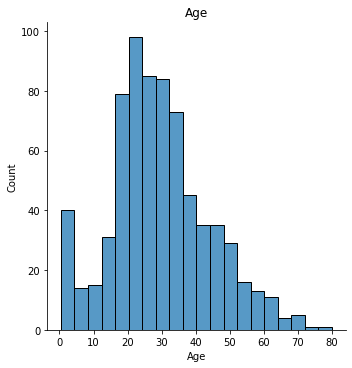

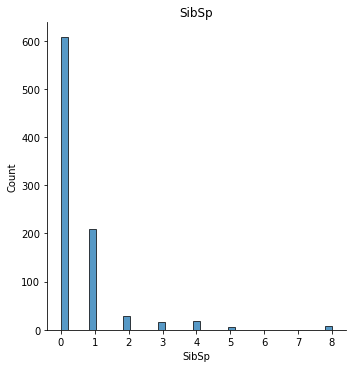

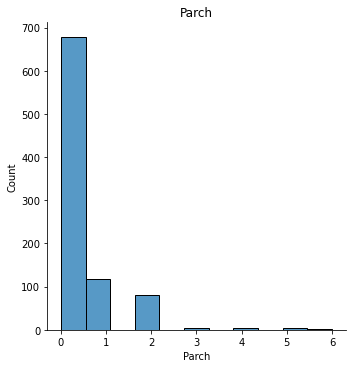

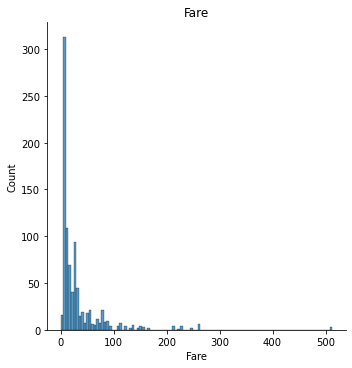

In [7]:
# Histogram for all numerical variables
for i in train_num.columns:
    sns.displot(train_num[i])
    plt.title(i)
    plt.show()

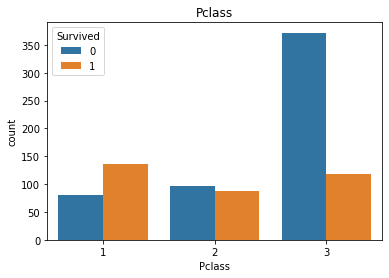

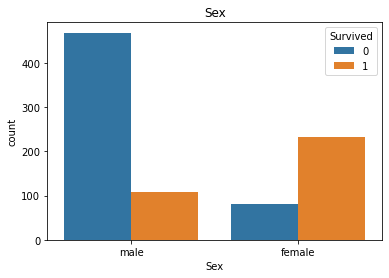

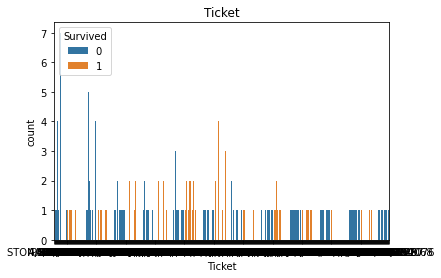

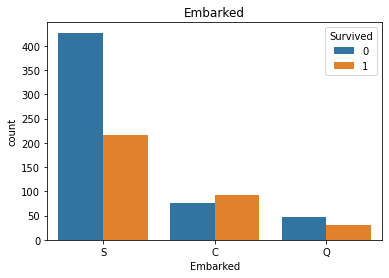

In [8]:
for i in train_cat.columns[1:]:
    sns.countplot(x = train_cat[i], hue='Survived', data=train_cat)
    plt.title(i)
    plt.show()

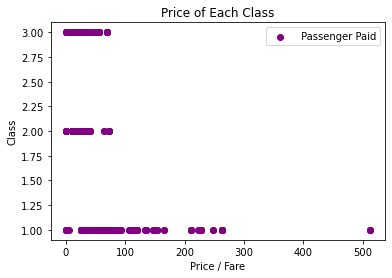

In [9]:
# Plot the prices paid of each class
plt.scatter(train_df['Fare'], train_df['Pclass'], color = 'purple', 
           label = ' Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [10]:
# Pivot Table by sex and passenger class
train_df.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [11]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
# Looking at survival rate by sex, age and class
age = pd.cut(train_df['Age'], [0,18,80])
train_df.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

# Data Cleaning 

In [13]:
print(df.dtypes)
df.shape

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
train_test       int64
dtype: object


(1309, 13)

In [14]:
#Drop the unnecessary columns in the data
titanic = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)


# Remove the rows with missing values
df_new = titanic.dropna(subset = ['Embarked'])


# Impute nulls for continuous data 
# df_new.Age = df_new.Age.fillna(train_df.Age.mean())
df_new.Age = df_new.Age.fillna(train_df.Age.median())

# df_new.Fare = df_new.Fare.fillna(train_df.Fare.mean())
df_new.Fare = df_new.Fare.fillna(train_df.Fare.median())


# Checking the types and shape
print(df_new.isna().sum())
df_new.shape

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
train_test       0
dtype: int64


/Users/roywong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(1307, 10)

# Machine Learning 

<ipython-input-15-80c170f3bdc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['norm_fare'] = np.log(df_new.Fare+1)
/Users/roywong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


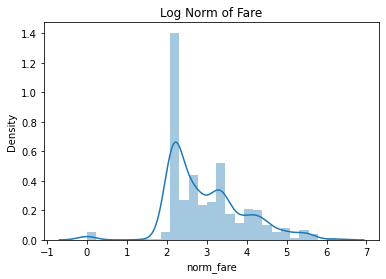

In [15]:
# log norm of fare (used)
df_new['norm_fare'] = np.log(df_new.Fare+1)
sns.distplot(df_new['norm_fare'])
plt.title('Log Norm of Fare')
plt.show()

In [16]:
# converted fare to category for pd.get_dummies()
df_new.Pclass = df_new.Pclass.astype(str)

# created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(df_new[['Pclass','Sex','Age','SibSp','Parch','norm_fare',
                                     'Embarked','train_test']])

# Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


Y_train = df_new[df_new.train_test==1].Survived
Y_train.shape

/Users/roywong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(889,)

In [17]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

In [18]:
# Required Default Machine Learning Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [19]:
# Create function with many machine Learning models
def models(X_train, Y_train):
    
    
    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0, max_iter=2000)
    log.fit(X_train, Y_train)
    #cv_log = cross_val_score(log, X_train, Y_train, cv=5)
    
    
    # KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(X_train, Y_train)
    #cv_knn = cross_val_score(knn, X_train, Y_train, cv=5)
    
    
    # SVC (linear kernel)
    from sklearn.svm import SVC, LinearSVC
    svc_lin = SVC(kernel = 'linear', random_state=0)
    svc_lin.fit(X_train, Y_train)
    #cv_svc_lin = cross_val_score(svc_lin, X_train, Y_train, cv=5)
    
    
    # SVC (RBF kernel)
    from sklearn.svm import SVC, LinearSVC
    svc_rbf = SVC(kernel = 'rbf', random_state=0)
    svc_rbf.fit(X_train, Y_train)
    #cv_svc_rbf = cross_val_score(svc_rbf, X_train, Y_train, cv=5)
    
    
    # Gaussian NB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    #cv_gauss = cross_val_score(gauss, X_train, Y_train, cv=5)
    
    
    # Decision Tree Regressor
    from sklearn.tree import DecisionTreeRegressor
    tree = DecisionTreeRegressor(criterion = 'entropy', random_state=1)
    tree.fit(X_train, Y_train)
    #cv_tree = cross_val_score(tree, X_train, Y_train, cv=5)
    
    
    # Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=1)
    forest.fit(X_train, Y_train)
    #cv_forest = cross_val_score(forest, X_train, Y_train, cv=5)
    
    
    # Print the training accuracy for each model
    print('[0]Logistic Regression Training Accuracy: ', round(log.score(X_train, Y_train)*100,4),'%')
    print('[1]K Neighbors Training Accuracy: ', round(knn.score(X_train, Y_train)*100,4),'%')
    print('[2]SVC Linear Training Accuracy: ', round(svc_lin.score(X_train, Y_train)*100,4),'%')
    print('[3]SVC RBF Training Accuracy: ', round(svc_rbf.score(X_train, Y_train)*100,4),'%')
    print('[4]Gaussian NB Training Accuracy: ', round(gauss.score(X_train, Y_train)*100,4),'%')
    print('[5]Decision Tree Training Accuracy: ', round(tree.score(X_train, Y_train)*100,4),'%')
    print('[6]Random Forest Training Accuracy: ', round(forest.score(X_train, Y_train)*100,4),'%')
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [20]:
# Get and train all the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy:  79.4151 %
[1]K Neighbors Training Accuracy:  85.4893 %
[2]SVC Linear Training Accuracy:  78.6277 %
[3]SVC RBF Training Accuracy:  71.5411 %
[4]Gaussian NB Training Accuracy:  77.8403 %
[5]Decision Tree Training Accuracy:  97.9753 %
[6]Random Forest Training Accuracy:  96.5129 %


# Model Selection

In [21]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)
tree.score(X_train, Y_train)
acc_dec_tree = round(tree.score(X_train, Y_train)*100,4)
acc_dec_tree

97.9753

In [22]:
results = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Sex" : test_df["Sex"],
        "Survived": Y_pred
    })
results.to_csv('Model V1.csv', index=False)

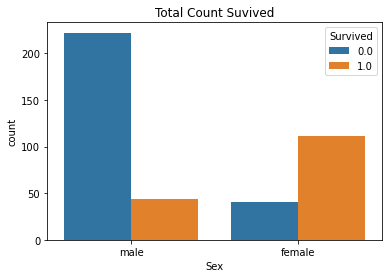

In [23]:
sns.countplot(x='Sex', hue = 'Survived', data=results)
plt.title('Total Count Suvived')
plt.show()

In [24]:
round(results['Survived'].value_counts(normalize=True)*100,1).astype(str) + '%'

0.0    62.9%
1.0    37.1%
Name: Survived, dtype: object

- 1 = Yes (Survived)
- 0 = No (Did not survived)

the data that was tested shows that the passengers has a higher
percentage of not surviving